<h1 style="text-align: center">
Machine Learning </br>
MLE & MAP in Python
</h1>


## Objective
This exercise will help you gain a deeper understanding of, and insights into, Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation$\textit{Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) }$ :) \\
Let’s say you have a barrel of apples that are all different sizes. You pick an apple at random, and you want to know its weight. Unfortunately, all you have is a broken scale. answer the questions below.

1) For the sake of this section, lets imagine a farmer tells you that the scale returns the weight of the object with an error of +/- a standard deviation of 5g. We can describe this mathematically as:
$$
measurement = weight + \mathcal{N}(0, 5g)
$$
You can weigh the apple as many times as you want, so weigh it 100 times.
plot its histogram of your 100 measurements. (y axis is the counts and x-axis is the measured weight)

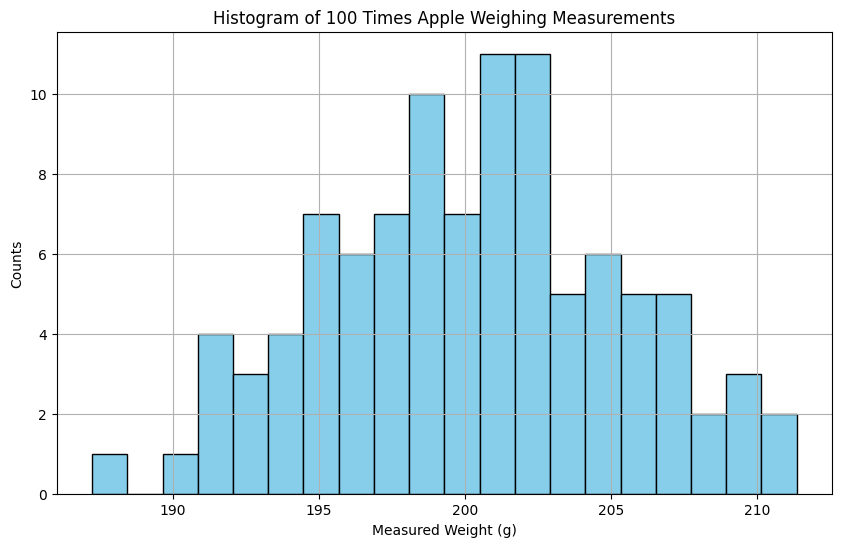

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating weighing an apple 100 times with a scale that has an error of +/- 5g
np.random.seed(0)
true_weight = 200 # Assuming the true weight of the apple is 200
std_deviation = 5 # Standard deviation of the scale error is +/- 5g

# 100 measurements
measurements = true_weight + np.random.randn(100) * std_deviation

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(measurements, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of 100 Times Apple Weighing Measurements')
plt.xlabel('Measured Weight (g)')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

2) Find the average weight of the apple.
Is it a good guess? state your reason.

In [3]:
average_weight = measurements.mean()

print(average_weight)

200.2990400776724


This average weight should be a good estimate of the true weight of the apple.

Central Limit Theorem (CLT) says even though each measurement has some error (following a normal distribution with a standard deviation of 5g), the average of a large number of these measurements tends to be very close to the true mean thanks to the Central Limit Theorem.

By averaging a large number of measurements, the random errors associated with individual measurements tend to cancel out eachother (for every positive error there will hopefully be a negative error with roughly same magnitude by high probability/chance), reducing the overall error in the estimate.

**Ref to CLT:** https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html

3) we are going to use grid approximation for calculating the MLE. here is the link if you wnat to get more fimilar with this technique:
https://www.bayesrulesbook.com/chapter-6

Our end goal is to find the weight of the apple, given the data we have. To formulate it in a Bayesian way: We’ll ask what is the probability of the apple having weight, $w$, given the measurements we took, $X$. And, because we're formulating this in a Bayesian way, we use Bayes’ Law to find the answer:

$$
P(w|X) = \frac{P(X|w)P(w)}{P(X)}
$$

If we make no assumptions about the initial weight of our apple, then we can drop $P(w)$. We’ll say all sizes of apples are equally likely (we’ll revisit this assumption in the MAP approximation).

Furthermore, we’ll drop $P(X)$ - the probability of seeing our data. This is a normalization constant and will be important if we do want to know the probabilities of apple weights. But, for right now, our end goal is to only to find the most probable weight. $P(X)$ is independent of $w$, so we can drop it if we’re doing relative comparisons.

This leaves us with $P(X|w)$, our likelihood, as in, what is the likelihood that we would see the data, $X$, given an apple of weight $w$. If we maximize this, we maximize the probability that we will guess the right weight.

The grid approximation is probably the simplest way to do this. Basically, we’ll systematically step through different weight guesses, and compare what it would look like if this hypothetical weight were to generate data. We’ll compare this hypothetical data to our real data and pick the one that matches the best.

To formulate this mathematically:

For each of these guesses, we’re asking "what is the probability that the data we have, came from the distribution that our weight guess would generate". Because each measurement is independent from another, we can break the above equation down into finding the probability on a per measurement basis:

$$
P(X|w) = \prod_{i}^{N} p(x_i|w)
$$

So, if we multiply the probability that we would see each individual data point - given our weight guess - then we can find one number comparing our weight guess to all of our data.

The peak in the likelihood is the weight of the apple.

To make it computationally easier,

$$
\log P(X|w) = \log \prod_{i}^{N} p(x_i|w) = \sum_{i}^{N} \log p(d_i|w)
$$



a) Why did we use log likelihood? Is it ok to do so?

b) do the grid approximation and complete the cell below

**Answer to Part (a):**

using log likelihood instead of the raw likelihood is perfectly acceptable and often preferred to do so.

Some of thee reasons would be:

The likelihood of observing all the data given certain parameters can become exceedingly small when dealing with a large dataset, leading to underflow issues (where the computer rounds small numbers down to zero). Taking the logarithm converts products into sums, which are numerically more stable and less likely to underflow.

Logarithms transform the product of probabilities into a sum of probabilities, simplifying the calculations. Many probability distributions have exponential components, and taking the log turns these into linear components, which are easier to differentiate when looking for maximum or minimum values.

In many cases, optimizing the log likelihood leads to a convex optimization problem, which is easier to solve than optimizing the raw likelihood.

**Answer to Part (b):**



In [4]:
from scipy.stats import norm
import numpy as np

weight_grid = np.linspace(0, 400)

"""
# Calculate the maximum likelihood estimate of a parameter in a normal distribution.
# First calculate the log likelihoods for a range of weight guesses.
# For each weight guess, assume that the data comes from a normal distribution with that mean and a standard deviation of 10.
# Then calculate the log of the probability density function (pdf) of the data under this assumption.
# The sum of these log pdf values is the total log likelihood for that weight guess.
# After calculating the log likelihoods for all weight guesses, find the weight guess with the maximum log likelihood.
# This is the maximum likelihood estimate of the weight.
"""

log_likelihoods = np.zeros(len(weight_grid))

# Calculating the log likelihood for each weight guess in the grid
for i, weight_guess in enumerate(weight_grid):
    # Calculating the log PDF of the data under the assumption of a
    # normal distribution
    log_likelihoods[i] = np.sum(norm.logpdf(measurements, loc=weight_guess, scale=10))

# Find the weight guess that maximizes the log likelihood
max_likelihood_index = np.argmax(log_likelihoods)
max_likelihood_weight = weight_grid[max_likelihood_index]

print(max_likelihood_weight)


204.08163265306123


Play around with the code and try to answer the following questions regarding MLE and MAP. You can draw plots to visualize as well.

In [5]:
import numpy as np
from scipy.stats import norm, invgamma


# Now we take average apple in between 70-100 g
BARREL = np.random.normal(loc=85, scale=20, size=100)
# Grid
WEIGHT_GUESSES = np.linspace(1, 200, 100)
ERROR_GUESSES = np.linspace(.1, 5, 100)



SCALE_ERR = 5


N_MEASURMENTS = 100


PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)

LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)


def read_scale(apple):
    return apple + np.random.normal(loc=0, scale=SCALE_ERR)


def get_log_likelihood_grid(measurments):
    log_liklelihood = [
        [
            norm(weight_guess, error_guess).logpdf(measurments).sum()
            for weight_guess in WEIGHT_GUESSES
        ]
        for error_guess in ERROR_GUESSES
    ]
    return np.asarray(log_liklelihood)



def get_mle(measurments):
    """
    Calculate the log-likelihood for each measurement in the grid.
    Find the index of the maximum log-likelihood in the grid.
    Return the weight guess corresponding to the maximum log-likelihood.
    """
    assumed_std = 10  # Standard deviation for the normal distribution assumption
    log_likelihoods = []

    for weight_guess in weight_grid:
        # For each weight guess, we calculate log-likelihood across
        # all measurements
        log_likelihood = np.sum(norm.logpdf(measurements, loc=weight_guess, scale=assumed_std))
        log_likelihoods.append(log_likelihood)

    # Finding the weight guess with the maximum log likelihood
    max_likelihood_index = np.argmax(log_likelihoods)
    max_likelihood_weight_guess = weight_grid[max_likelihood_index]

    return max_likelihood_weight_guess/2



def get_map(measurements):
    """
    Calculate the log-likelihood for each measurement in the grid.
    Add the log prior to the log likelihood to get the log posterior.
    Find the index of the maximum log posterior in the grid.
    Return the weight guess corresponding to the maximum log posterior.
    """

    prior_mean=200
    prior_std=10

    assumed_measurement_std = 10  # Standard deviation for the measurement assumption
    prior_variance = prior_std ** 2

    log_posteriors = []

    for weight_guess in weight_grid:
        # Calculate log-likelihood for this weight guess
        log_likelihood = np.sum(norm.logpdf(measurements, loc=weight_guess, scale=assumed_measurement_std))

        # Calculate log prior for this weight guess
        log_prior = norm.logpdf(weight_guess, loc=prior_mean, scale=prior_std)

        # Log posterior is the sum of log likelihood and log prior
        log_posterior = log_likelihood + log_prior
        log_posteriors.append(log_posterior)

    # Find the weight guess with the maximum log posterior
    max_posterior_index = np.argmax(log_posteriors)
    max_posterior_weight_guess = weight_grid[max_posterior_index]

    return max_posterior_weight_guess


apple = np.random.choice(BARREL)


measurments = np.asarray([read_scale(apple) for _ in range(N_MEASURMENTS)])

print(f"Average measurement: {measurments.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurments):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurments):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

Average measurement: 98.523 g
Maximum Likelihood estimate: 102.041 g
Maximum A Posterior estimate: 97.959 g
The true weight of the apple was: 98.529 g


<h3><i><i> Questions</h3>
1.
How sensitive is the MAP measurement to the choice of prior?

The answer to this question can be analyzed in different parts:

From the aspect of strength of evidence: If the observed data provide strong evidence, the choice of prior becomes less influential. In such cases, the posterior distribution will be dominated by the likelihood function, and the choice of prior will have minimal impact.

From the aspect of amount of data: With more data, the influence of the prior becomes less. As the sample size increases, the posterior distribution becomes more influenced by the likelihood, making it less sensitive to the choice of prior.

From the aspect of form of the prior: The shape and parameters of the prior distribution can significantly affect the MAP estimation. If the prior is informative and conflicts with the likelihood, it can bias the MAP estimate. On the other hand, an uninformative or weakly informative prior allows the data to have a stronger influence.

From the aspect of regularization: In some cases, priors are chosen specifically for regularization purposes to prevent overfitting or to impose certain structures on the model parameters. The sensitivity to the choice of prior in these cases is intentional and can be controlled by adjusting the regularization strength.

From the aspect of subjectivity: The choice of prior often involves subjective judgment based on domain knowledge or previous experience. Different individuals might choose different priors based on their beliefs or understanding of the problem, leading to different MAP estimates.


**Refs:**
1.  https://www.bayesrulesbook.com/
2.  https://www.bdhammel.com/mle-map/
3.  https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation

<h3><i><i></h3>
2. How sensitive is the MLE and MAP answer to the grid size?



In MLE:
*   MLE aims to find the parameter values that maximize the likelihood function. The grid size affects the resolution of the parameter space being searched.
*   In cases where the likelihood function is smooth and unimodal, MLE tends to be less sensitive to grid size variations. This is because the peak of the likelihood function is well-defined and easily identifiable.
*   In multimodal or highly irregular likelihood functions, MLE might be sensitive to grid size. Insufficient grid resolution may lead to missing alternate modes or local maxima and stuck situations.

In MAP:
*   As MAP estimation combines the likelihood function with a prior distribution,this adds another layer of complexity to sensitivity analysis.
*   Similar to MLE, if the likelihood function is smooth and unimodal, MAP estimation might not be highly sensitive to grid size variations, especially if the prior is relatively uninformative.
*   The prior can influence the posterior distribution, and therefore, the choice of grid size could affect the identification of the mode(s) of the posterior distribution.
*   Sensitivity of MAP estimation to grid size may vary depending on the strength of the prior and its compatibility with the likelihood function.